In [1]:
#libraries 
import pandas as pd
import gzip
from tqdm import tqdm

from datetime import datetime
from datetime import date, time
from dateutil.parser import parse
import numpy as np



from bokeh.plotting import figure, output_notebook, show,output_file,gridplot
from bokeh.models import DatetimeTickFormatter,HoverTool,Span

import json
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


In [2]:
#load the dataframe for a given product only (is it possible?)
pickle_off = open("electronics_meta_sentiment.pickle","rb")
df = pickle.load(pickle_off)


In [8]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'reviewText', 'overall',
       'summary', 'reviewTime', 'year', 'length_review', 'title', 'brand',
       'price', 'sub_category_0', 'sub_category_1', 'sales_category',
       'sales_rank', 'score', 'sentiment_com', 'sentiment_pos',
       'sentiment_neg', 'sentiment_neu', 'helpfulness'],
      dtype='object')

In [4]:
l=[]
for i in df.index:
    if df.helpful[i][1]==0:
        l.append(None)
    else:
        l.append(df.helpful[i][0]/df.helpful[i][1])
df['helpfulness']=l
del df['helpful']
del df['unixReviewTime']

In [42]:
df['classification']=list(map(lambda x:2*(x>0)-1,df.sentiment_com))

In [73]:
n=70458
print(df.iloc[n,3])
print(df.iloc[n,16:])

I have been listening to this speaker for well over a year (I own two of these). I set up a surround system in my classroom. I wanted my students to enjoy film as it was intended. I purchased this center channel because it was priced reasonably ($100.00) and sounds fantastic.As an English teacher, I do show films to reinforce the literature I present to my students. One of the films I show in my class is Superman (1978). I would argue that this film truly started the super hero genre in film! I wonder if films such as Spiderman, The X-men, Batman Begins and The Dark Knight would even have been made if it wasn't for Superman.Still, this review isn't about the film....back to the BIC Center Channel (DV-62CLR-S. The speaker performs well at any volume level. I have turned it up to reference levels in my classroom and it sounds crystal clear! My students have commented that the system in my classroom sounds as good as a movie theater.While the speaker sounds great with films, it also shine

# I- Timeline

## a) From 1996 to 2014 :
We are interested in the evolution of certain variables through the years. These variables are :
- number of reviews
- number of reviewers
- length of reviews
- helpfulness of reviews
- overall score

We are going to compute the daily median/mean value for each category.

In [44]:
evolution= df.groupby(['sub_category_1','reviewTime']).median()
evolution['number_reviews']=df.groupby(['sub_category_1','reviewTime']).count().asin
evolution.year=list(map(lambda x:int(x) , evolution.year))

In [45]:
evolution.head()

overall  year  length_review  price  sales_rank  \
sub_category_1 reviewTime                                                    
Accessories    2000-04-27      5.0  2000           87.0  27.99      8755.0   
               2001-01-08      5.0  2001          106.0  27.99      8755.0   
               2002-06-30      5.0  2002           78.0  27.99      8755.0   
               2002-10-31      5.0  2002           81.0  27.99      8755.0   
               2004-01-02      5.0  2004          163.0  27.99      8755.0   

                           sentiment_com  sentiment_pos  sentiment_neg  \
sub_category_1 reviewTime                                                
Accessories    2000-04-27         0.9110          0.164          0.024   
               2001-01-08         0.9190          0.176          0.042   
               2002-06-30         0.9843          0.342          0.015   
               2002-10-31         0.4927          0.127          0.090   
               2004-01-02         0.8914          0.108          0.035   

                           sentiment_neu  helpfulness  classification  \
sub_category_1 reviewTime                                               
Accessories    2000-04-27          0.811     0.891892             1.0   
               2001-01-08          0.783     0.500000             1.0   
               2002-06-30          0.643     1.000000             1.0   
               2002-10-31          0.783     1.000000             1.0   
               2004-01-02          0.857     0.875000             1.0   

                           number_reviews  
sub_category_1 reviewTime                  
Accessories    2000-04-27               1  
               2001-01-08               1  
               2002-06-30               1  
               2002-10-31               1  
               2004-01-02               1

In [46]:
categories=list(set(df.sub_category_1))
categories

['Connected Devices',
 'Portable Audio & Video',
 'Interior Accessories',
 'Accessories',
 'Tools & Equipment',
 'eBook Readers & Accessories',
 'Security & Surveillance',
 'Electronics Warranties',
 'Service & Replacement Plans',
 'Television & Video',
 'Luggage & Travel Gear',
 'Cell Phones',
 'GPS & Navigation',
 'Home Audio',
 'Accessories & Supplies',
 'Camera & Photo',
 'Car & Vehicle Electronics',
 'Cases',
 'Car Care',
 'Computers & Accessories']

In [47]:
categories=['Computers & Accessories','Portable Audio & Video','eBook Readers & Accessories','Camera & Photo','Cell Phones']
colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
len(categories)

5

In [74]:
def compare_timeline(p,variable,category,c='navy'):
    data=evolution.loc[category,variable]
    avg=data.rolling(15,center=True).median()
    #hover=HoverTool(tooltips=[( 'Year',   '@year'),( category,  '@'+str(variable) ),],)
    p.line(data.index.values,avg,color=c,legend=str(category))
    p.xaxis[0].formatter = DatetimeTickFormatter(days='%m/%d',years='%Y',months='%B')
    return p


i=0
p = figure(width=1000, height=500, x_axis_type="datetime",tools=['pan','wheel_zoom','box_zoom','reset'])
for cat in categories:
    p=compare_timeline(p,'number_reviews',str(cat),colors[i])
    i=i+1
    p.title.text='evolution of the median daily number of reviews for'+str(cat)
    p.legend.location = "top_left"
    p.grid.grid_line_alpha=0
    p.xaxis.axis_label = 'Date'
show(p)

In [75]:
i=0
for cat in categories:
    p = figure(width=1000, height=500, x_axis_type="datetime",tools=['pan','wheel_zoom','box_zoom','reset'])
    p=compare_timeline(p,'length_review',str(cat),colors[i])
    i=i+1
    p.title.text='evolution of the median daily value of length of the reviews for'+str(cat)
    p.legend.location = "top_left"
    p.grid.grid_line_alpha=0
    p.xaxis.axis_label = 'Date'
    show(p)

In [51]:
i=0
for cat in categories:
    p = figure(width=1000, height=500, x_axis_type="datetime",tools=['pan','wheel_zoom','box_zoom','reset'])
    p=compare_timeline(p,'sentiment_com',str(cat),colors[i])
    i=i+1
    p.title.text='evolution of the median daily value of sentiment score for'+str(cat)
    p.legend.location = "top_left"
    p.grid.grid_line_alpha=0
    p.xaxis.axis_label = 'Date'
    show(p)

In [52]:
from pandas.core import datetools

/Users/sonia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  """Entry point for launching an IPython kernel.


In [53]:
#monthly average 
def monthly_mean(category):
    r =evolution.loc[category].resample('M')
    monthly_mean =r.median()
    return monthly_mean

def monthly_std(category):
    r =evolution.loc[category].resample('M')
    monthly_std=r.std()
    return monthly_std


In [54]:
def monthly_timeline(category,variable):
    mean=monthly_mean(category)
    std=monthly_std(category)
    moving_avg = mean[variable].rolling(6,center=True).median()
    p = figure(width=1000, height=500, x_axis_type="datetime")
    p.title.text=str(category)
    p.circle(mean.index,mean[variable],alpha=0.7)
    p.line(mean.index,moving_avg, color='#e34a33')
    p.line(mean.index,mean[variable]+std[variable], color='#7fcdbb')
    p.line(mean.index,mean[variable]-std[variable], color='#7fcdbb')
    return p

for cat in categories:
    p=monthly_timeline(str(cat),'length_review')
    show(p)



In [60]:
#special sentiment scores 
def variation_year (category,year):
    data=evolution.loc[str(category)]
    data=data.loc[round(data.year)==year,'classification']
    M=2
    m=-2
    plot = figure(plot_width=1000, plot_height=500,y_range=[m,M],x_axis_type="datetime")
    plot.vbar(x=data.index, width=1, bottom=0, top=data, color="navy")
    #plot.vbar(x=data.index, width=1, bottom=0, top=data_neg, color="red")
    average = Span(location=0,dimension='width', line_color='green', line_width=1)
    plot.title.text='number of positive/negative reviews for '+str(category)+' - '+str(year)
    plot.legend.location = "top_left"
    plot.grid.grid_line_alpha=0.6
    plot.xaxis.axis_label = 'Date'
    plot.xaxis[0].formatter = DatetimeTickFormatter(months='%d%B')
    plot.renderers.extend([average])
    return plot

for cat in categories:
    p=variation_year(str(cat),2013)
    show(p)


# II-Distributions 

In [35]:
def distribution (category):
    data=df[df.sub_category_1==str(category)]
    w= np.ones_like(data['overall'])/float(len(data['overall']))
    plt.figure(figsize=(15,7))
    plt.subplot(2,2,1)
    plt.hist(data['overall'],weights=w)
    plt.title('overall score')
    plt.grid()
    plt.subplot(2,2,2)
    w= np.ones_like(data.length_review)/float(len(data.length_review))
    plt.hist(data['length_review'],weights=w)
    plt.grid()
    plt.title('length of reviews')
    plt.subplot(2,2,3)
    w= np.ones_like(data.helpfulness.dropna())/float(len(data.helpfulness.dropna()))
    plt.hist(data['helpfulness'].dropna(),weights=w)
    plt.grid()
    plt.title('helpfulness')
    plt.subplot(2,2,4)
    w= np.ones_like(data.sentiment_pos)/float(len(data.sentiment_pos))
    plt.hist(data['sentiment_pos'],weights=w)
    plt.grid()
    plt.title('positiveness')
    
    plt


Computers & Accessories
Portable Audio & Video
eBook Readers & Accessories
Camera & Photo
Cell Phones


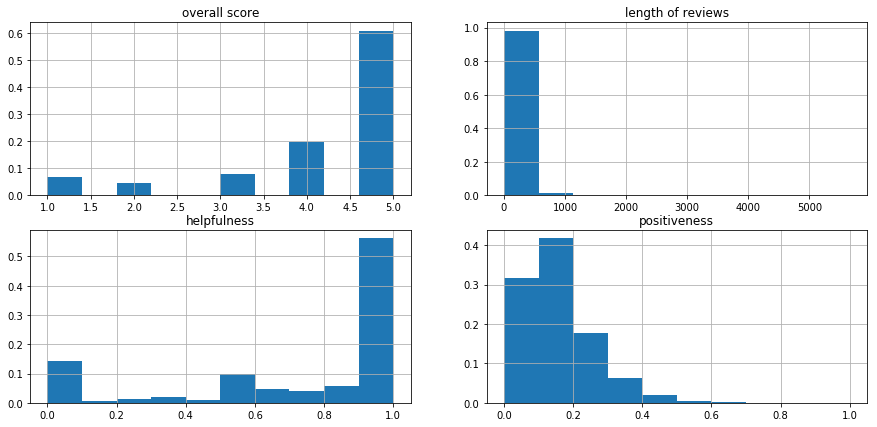

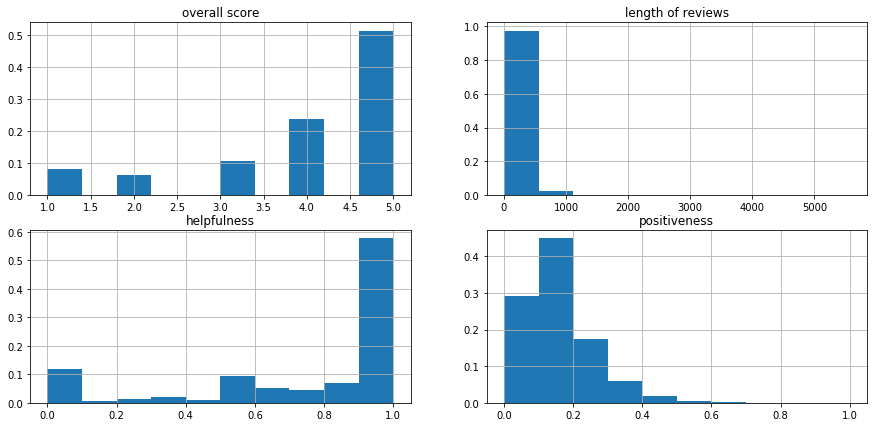

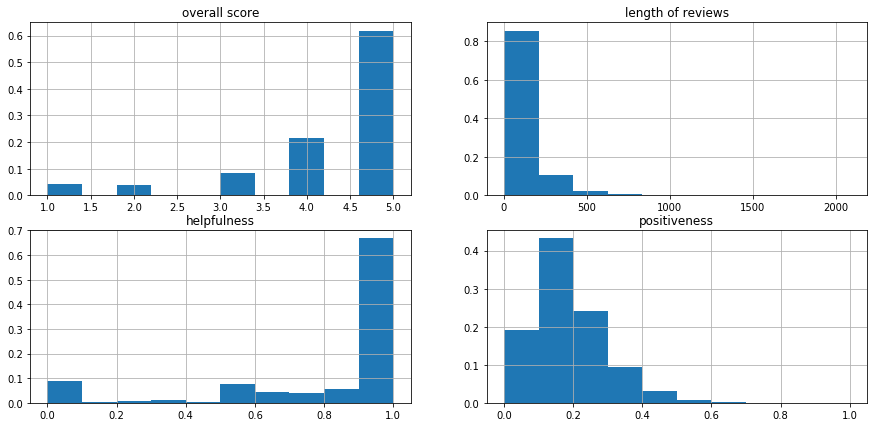

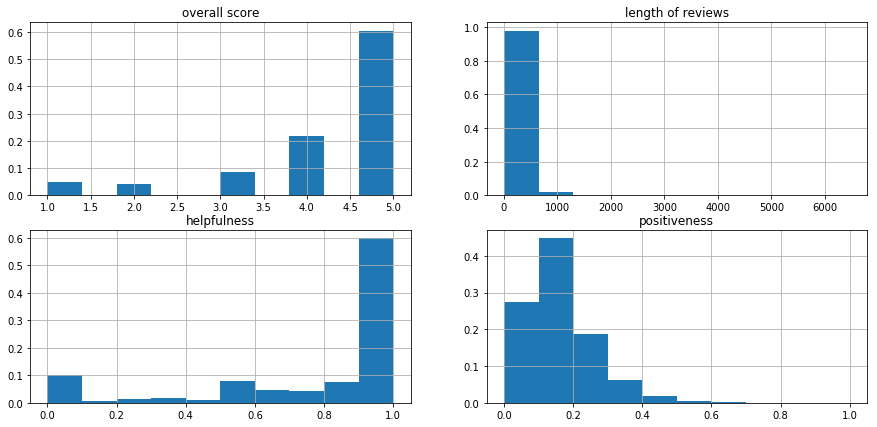

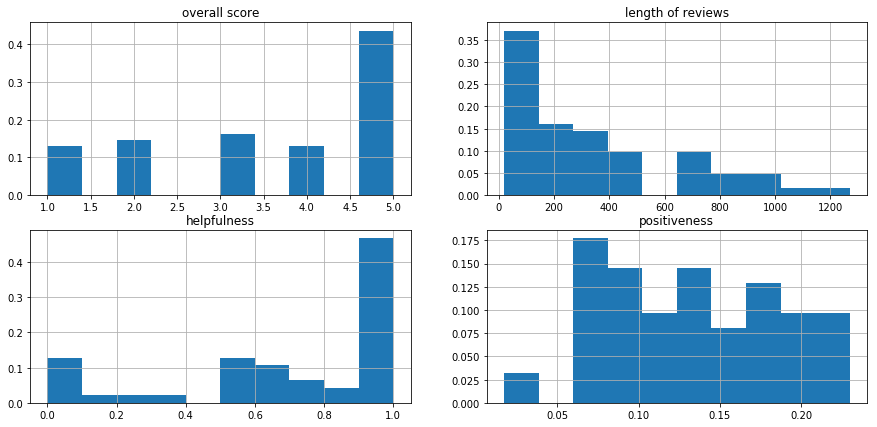

In [49]:
for n in categories:
    print(n)
    distribution(n)


In [83]:
# 2014 data + 2013 
# stratify the data according to rating / category 
df_2014.shape

(8, 8)

In [88]:
df_2014=df.loc[df.year==2014,['overall','length_review','price','sales_rank','helpfulness','sentiment_pos','sentiment_neg','sentiment_com']].corr()

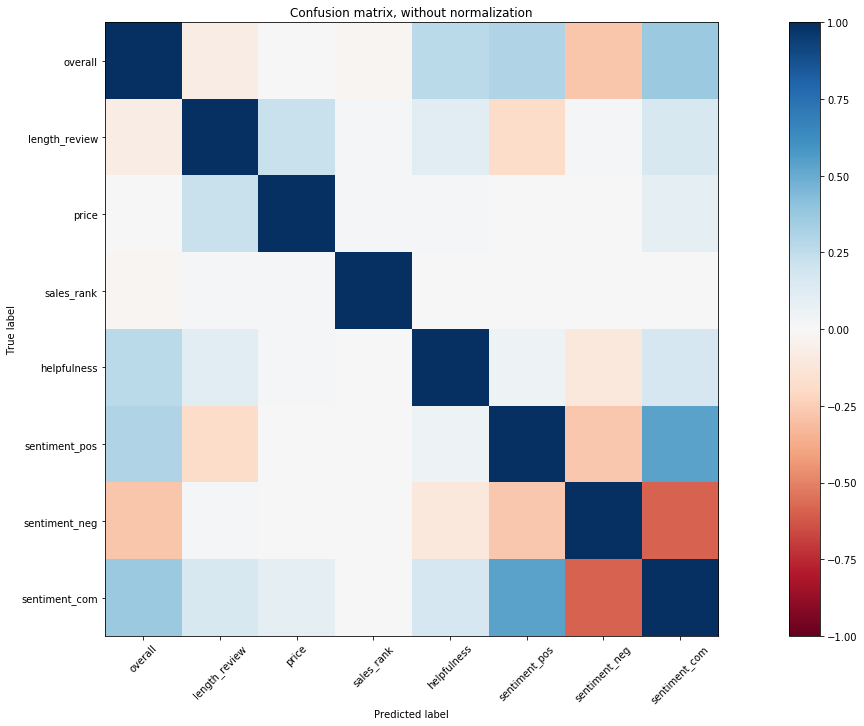

In [91]:

import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.RdBu):
    normalize=False
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.clim(-1,1)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(20,10))
plot_confusion_matrix(df_2014, classes=df_2014.columns,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure(figsize=(20,10))
#plot_confusion_matrix(normalized_confustion_matrix, classes=newsgroups20.target_names,title='Normalized confusion matrix')

plt.show()               
               


## b) Correlations between different characteristics of the product :

In [ ]:
def corr (x,y,c):
    p = figure(width=1000, height=500)
    p.circle(df_2014[x],df_2014[y],color=c,alpha=0.5)
    p.legend.location = "top_left"
    p.grid.grid_line_alpha=0
    p.xaxis.axis_label = x
    p.yaxis.axis_label = y
    return p


In [ ]:
p=corr('overall','helpfulness','#1f78b4')
show(p)

## V- Extra Info 

In [ ]:

def information_category(df,category,info):
    info.loc[category,'number_products']=len(set(df.asin))
    info.loc[category,'number_of_reviews']=len(df.asin)
    info.loc[category,'number_of_reviewers']=len(set(df.reviewerID)) 
    info.loc[category,'first_review']=min(df.reviewTime)
    info.loc[category,'last_review']=max(df.reviewTime)
    return info 
    

In [ ]:
info=pd.DataFrame([])
info=information_category(df_com,'Computers',info)
info=information_category(df_cam,'Cameras',info)
info=information_category(df_TV,'Televisions',info)
info=information_category(df_ebook,'Ebook readers',info)
info=information_category(df_AudioVid,'Portable Audio Video',info)

info

In [ ]:
def create_variables_byProduct (df):
    count=df.groupby('asin').count()
    count=count['overall']

    prod = df.groupby('asin').mean()
    prod.year=list(map(lambda x:int(x) , prod.year))
    del prod['unixReviewTime']

    #add count
    prod=pd.concat([prod,count],axis=1)
    
     
    prod['first_review']=list(map(lambda x:min(df.loc[df.asin==x,'reviewTime']),prod.index))
    prod['last_review']=list(map(lambda x:max(df.loc[df.asin==x,'reviewTime']),prod.index))
    prod['number_of_reviewers']=list(map(lambda x:len(set(df.loc[df.asin==x,'reviewerID'])),prod.index))

#helpfulness:
    tab=pd.DataFrame([],index=df.asin.unique())
    l=[]
    for Id in tab.index:
        data=df[df.asin==Id].helpful
        helpful=sum(map(lambda x:x[0],data))
        total=sum(map(lambda x:x[1],data))
        if total == 0 :
            l.append(0)
        else:
            l.append(round(helpful/total,2))

    tab['helpfulness']=l
    prod=pd.concat([prod,tab],axis=1)
    
    return prod

